In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

raw_df = pd.read_excel('C:\\Users\\Merci\\Desktop\\New folder\\credit-card-default-prediction\\default_of_credit_card_clients.xls', skiprows=1)
raw_df.drop(['ID'], axis = 1, inplace = True)
data_one_hot = pd.get_dummies(raw_df, columns=['SEX', 'EDUCATION', 'MARRIAGE'])
X_train, X_test, y_train, y_test = train_test_split(data_one_hot.iloc[:,0:-1], data_one_hot.iloc[:,-1], test_size=0.30)

In [7]:
X_train.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2
28818,100000,40,-2,-2,-2,-2,-2,-2,1895,0,...,0,1,0,0,0,0,0,0,1,0
10696,20000,26,0,0,0,0,0,2,11065,11788,...,0,1,0,0,0,0,0,0,0,1
24734,400000,47,0,0,0,0,0,0,105610,107495,...,0,1,0,0,0,0,0,0,1,0
28807,160000,35,-1,-1,-1,-1,0,0,335,0,...,0,0,0,1,0,0,0,0,1,0
2765,310000,35,0,0,0,0,0,0,7589,9463,...,0,0,1,0,0,0,0,0,1,0


In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

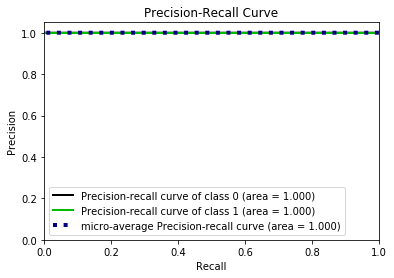

In [17]:
from sklearn import linear_model
import scikitplot as skplt

clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

y_hat_2 = clf.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_hat_2)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_hat_2, y_test)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [58]:
y_test

2308     0
22404    0
23397    0
25058    0
2664     0
8511     0
5148     0
7790     0
11311    1
19043    0
10784    0
22246    0
3268     0
15947    0
14977    0
14474    0
28694    0
14054    0
26545    0
14980    0
17636    0
3931     0
8387     0
8028     0
9482     0
22572    0
15107    0
3673     0
21388    0
5937     0
        ..
20564    0
25283    0
2309     0
3549     0
1766     0
7150     0
20485    0
4962     0
26775    0
21182    0
9680     0
4907     0
24634    0
18683    0
5164     0
27764    0
16520    0
17701    0
26895    0
23074    0
24302    0
11424    0
4638     0
17282    0
14533    0
18616    0
9451     0
8237     0
20250    0
1655     0
Name: MARRIAGE_3, Length: 15000, dtype: uint8